#  HOT AND COLD

##  QUESTION

R has a built-in data set named **CO2**, which contains data of CO2 uptake of 3 different plants, cultivated in Quebec and Mississipi, treated with cold or hot air. There are 12 different entities: Qc1, Qc2, Qc3, Qn1, Qn2, Qn3, Mc1, Mc2, Mc3, Mn1, Mn2, Mn3. The first letter symbolizes the place where the plant was cultivated, the second letter symbolizes treatment (chilled or non-chilled), and the number symbolizes the plant.

1) Let's view the summary of our data set:

```r
> summary(CO2)
     Plant             Type         Treatment       conc          uptake     
 Qn1    : 7   Quebec     :42   nonchilled:42   Min.   :  95   Min.   : 7.70  
 Qn2    : 7   Mississippi:42   chilled   :42   1st Qu.: 175   1st Qu.:17.90  
 Qn3    : 7                                    Median : 350   Median :28.30  
 Qc1    : 7                                    Mean   : 435   Mean   :27.21  
 Qc3    : 7                                    3rd Qu.: 675   3rd Qu.:37.12  
 Qc2    : 7                                    Max.   :1000   Max.   :45.50  
 (Other):42                                                              
```

2) Create a single histogram for both treatments: chilled and non-chilled. Its title should be "CO2 Uptakes of Chilled and Non-Chilled Plants", the x-axis label should be "CO2 Uptake", and the color for non-chilled plants should be blue. For chilled plants, use `col = rgb(1,0,0,0.5)`.

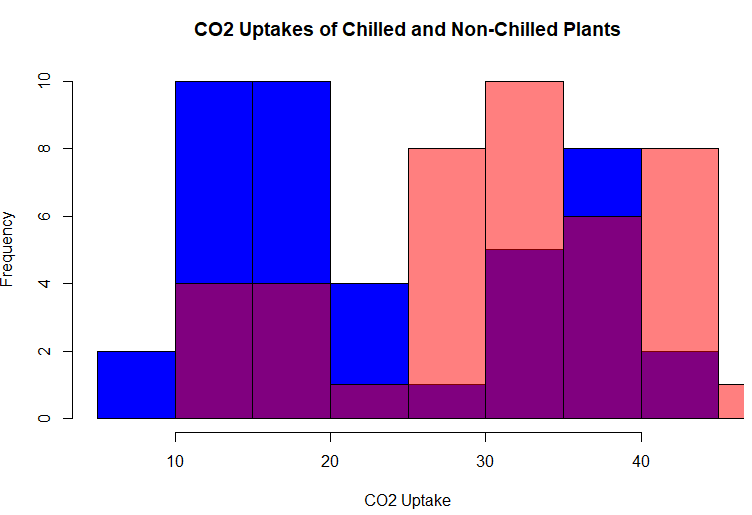

## SOLUTION

In [ ]:
#1
summary(CO2)

#2 Plotting two histograms together
hist(CO2$uptake[which(CO2[, "Treatment"] == "chilled")], 
     col = "blue", 
     main = "CO2 Uptakes of Chilled and Non-Chilled Plants", 
     xlab = "CO2 Uptake")
hist(CO2$uptake[which(CO2[, "Treatment"] == "nonchilled")], add= T, col = rgb(1,0,0,0.5))

# DOUBLE MAJOR

##  QUESTION

The psychology department of a university accepts students for its double major programme after eliminating the applicants in four steps :
 * In the first step, students who are not from Sociology department are eliminated.
 * In the second step, students with a GPA lower than 3.5 are eliminated.
 * In the third step, students with a GPA lower than the mean of GPA's of the students who had made it to this step are eliminated.
 * In the forth step , there will be an interview with the remaining students.

```r
RNGversion("3.3.1")
```
 
1) Copy the line above. Set seed to 3. Create 2 vectors named **gpas** which holds the GPAs of 40 applicants and **departments** which holds the departments of the applicants. GPAs are uniformly distributed 40 numbers between 3.30 and 4.00. Use two digits after decimal points. Departments are a sample choosen from three departments : "Sociology", "History", "Economics". (Do not change the order.)

```r
> gpas

[1] 3.42 3.87 3.57 3.53 3.72 3.72 3.39 3.51 3.70 3.74 3.66 3.65 3.67 3.69 3.91 3.88 3.38 3.79 3.93
[20] 3.50 3.46 3.31 3.39 3.37 3.47 3.85 3.72 3.94 3.69 3.83 3.57 3.56 3.42 3.62 3.48 3.54 3.92 3.44
[39] 3.71 3.45

> departments
 [1] "Sociology" "Economics" "Sociology" "History"   "History"   "Sociology" "Sociology"
 [8] "Sociology" "Sociology" "Economics" "Sociology" "Sociology" "Economics" "Economics"
[15] "Economics" "Economics" "History"   "Sociology" "Sociology" "Sociology" "Economics"
[22] "Sociology" "Economics" "Sociology" "Economics" "Sociology" "Economics" "History"  
[29] "History"   "Sociology" "Economics" "Economics" "Economics" "Economics" "History"  
[36] "History"   "Sociology" "Sociology" "Economics" "Economics"
```



2) Create a data frame named **applicants** with **gpas** and **departments** as such :
 
```r
> applicants
            GPA Department
Student 1  3.42  Sociology
Student 2  3.87  Economics
Student 3  3.57  Sociology
.
.
.
Student 39 3.71  Economics
Student 40 3.45  Economics

```

3) Create a function named **dbl_mjr** with one argument **dta** which has **applicants** as its default value. The function should do the following:
  * First, it will decide which applicants should pass the first step. Then it will create a global object named **first_step** which is a table (use `table()`) which shows the number of rejected students in the first step and the number of students which made it to the second step.
  * It will do the same thing for the second and third steps while creating global objects **second_step** and **third_step**.
  * It will return a data frame which holds information about the students which made it to the interview step. As such:
 
 ```r
>  dbl_mjr(dta = applicants) 
            GPA Department    Result
Student 18 3.79  Sociology Interview
Student 19 3.93  Sociology Interview
Student 26 3.85  Sociology Interview
Student 30 3.83  Sociology Interview
Student 37 3.92  Sociology Interview
 ```
 ```r
>  first_step
Result
   Rejected Second Step 
         23          17 
>  second_step
Result
  Rejected Third Step 
         6         11 
>  third_step
Result
 Rejected Interview 
        6         5 
```

*Hint: You can use the operator ``<<-`` for defining global objects in a local environment.*

4) Create another function named **general** with one argument **dta** which has **applicants** as its default value. The function should return a table which holds the number of eliminated students in each steps and number of students which made it to the interviews. 

**Rejected(1)** indicates that the student is eliminated in step 1. **Rejected(2)** in step 2 and so on. **Interview** indicates that the student made it to the final step. 
   
```r
> general(dta = applicants)
General Result
  Interview Rejected(1) Rejected(2) Rejected(3) 
          5          23           6           6
```

5) Plot 4 pie charts in the same image. First pie chart should show the information of the **first_step** and so on. Forth pie chart should show the general result which you can find using the **general** function.

Your charts should look like this:

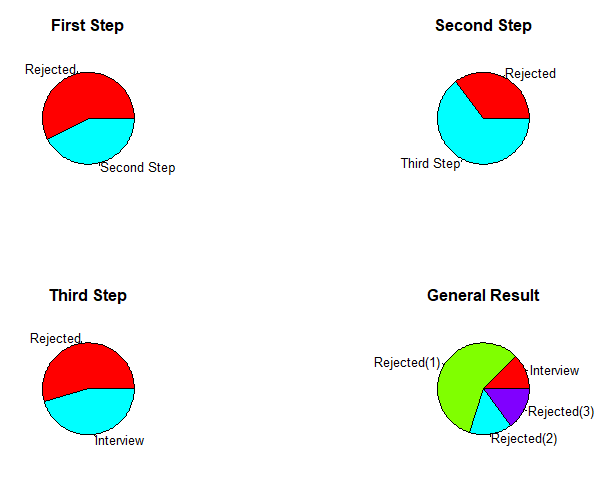

## SOLUTION

In [ ]:
#1
RNGversion("3.3.1")
set.seed(3)
gpas <- round(runif(40, min = 3.3, max = 4),digit = 2)
departments <- sample(size = 40, c("Sociology", "History", "Economics"), replace = T)
gpas
departments

#2
st_num <- paste("Student", 1:40) #Creating the vector which holds the row names of the data frame
applicants <- data.frame("GPA" = gpas,"Department" = departments)
rownames(applicants) <- st_num
applicants

#3
dbl_mjr <- function(dta = applicants)
{
  scnd <- c()
  for(i in 1:nrow(dta))
  {
    if(dta[i,2] == "Sociology")
    f <- "Second Step"
    else f <-"Rejected"
    scnd <- c(scnd, f) # scnd is a vector indicating whether the applicant rejected or not.
  }
  
  first_step <<- table("Result" = scnd) # Creating the table. "<<-" makes it global.
  dta1 <- cbind(dta,"Result" = scnd)
  dta2 <- dta1[dta1[,3 ] == "Second Step",] #Eliminating the rejected students in the first step and continuing with other students.
  
  thrd <- cut(dta2$GPA,breaks = c(-Inf,3.5,+Inf),labels = c("Rejected","Third Step")) #Creating the a factor object thrd which has the similar duty with scnd.
  second_step <<- table("Result" = thrd)
  dta3 <- cbind(dta2[,-3],"Result" = thrd)
  dta4 <- dta3[dta3[,3] == "Third Step",]
  

  mns <- mean(dta4$GPA) #Calculating the mean of GPAs of remaining students.
  
  intr <- cut(dta4$GPA, breaks = c(-Inf, mns, +Inf), labels = c("Rejected", "Interview"))
  third_step <<- table("Result" = intr)
  dta5 <- cbind(dta4[,-3], "Result" = intr)
  dta6 <- dta5[dta5[,3] == "Interview",] #dta6 holds only the students which made it to the interview step.
  
  
  return(dta6)
  
}


 dbl_mjr(dta = applicants) 
 first_step #first_step is a global object, so we can run this code outside of the function.
 second_step
 third_step

#4
general <- function(dta = applicants)
{
  
      dta_3rd <- dta[dta$GPA > 3.5 & dta$Department == "Sociology",] 
      mm <- mean(dta_3rd$GPA) #The mean of the students in the third step. 
      xx <-c()
      for(i in 1:nrow(dta)) # xx vectors holds the results of each student respectively.
      {
        if(dta[i,2] != "Sociology")
          xx <- c(xx, "Rejected(1)")
        else if(dta[i,1] <= 3.5)
          xx <- c(xx, "Rejected(2)")
        else if(dta[i,1] <= mm)
          xx <- c(xx, "Rejected(3)")
        else xx <- c(xx, "Interview")
      }
     
  return(table("General Result" = xx))
}
general(dta = applicants)

#5
par(mfrow = c(2,2)) #Using par() to show several graphs in one image. 
pie(first_step, main = "First Step", col = rainbow(2))
pie(second_step, main = "Second Step",col = rainbow(2))
pie(third_step, main = "Third Step", col = rainbow(2))
pie(general(applicants), main = "General Result", col = rainbow(4))    

# FACTOR GRAPHER

##  QUESTION

Burak's professor announced that she is going to give a homework but did not give specifics. Since Burak's schedule is extremely busy, he wants to do the homework beforehand. He is guessing that his professor would want him to plot some data, so he creates a function called **factor_grapher** that can plot whatever data he puts in it.

His function should take 3 inputs: the first plot's data called **data1**, the second plot's data called **data2**, and a categorical variable called **factor_column**.

- The function should ask whether Burak wants a plot of sums or means.

- If Burak wants a plot of sums, it should return a barplot that shows the sums of each category; if Burak wants a plot of means, it should return a line plot that shows the means of each category.

- After deciding on the operation, the function should ask the names of the plots.

*Hint: Data sets such as **iris** and **airquality** are built into R. You can check the built-in datasets of R with `data()`.*

*Hint: data sets may have NAs, get rid of them inside `tapply()`.*

Here are some example outputs:

```r
factor_grapher(data1 = iris$Sepal.Length, data2 = iris$Sepal.Width, factor_column = iris$Species)
     Do you want to plot sums or means? :means
     What do you want to name your plot 1 : sepal length
     What do you want to name your plot 2 : sepal width
```

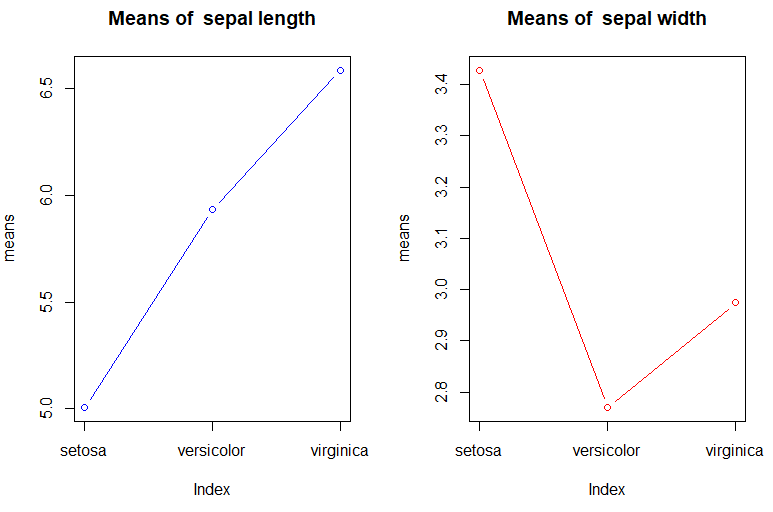

```r
airq <- airquality
label_vek<-c("May", "June", "July", "August", "September")
airq$Month <- factor(airq$Month,labels = label_vek)
factor_grapher(airq$Wind,airq$Solar.R,airq$Month)
     Do you want to plot sums or means? :sums
     What do you want to name your plot 1 : wind
     What do you want to name your plot 2 : solar rays
```

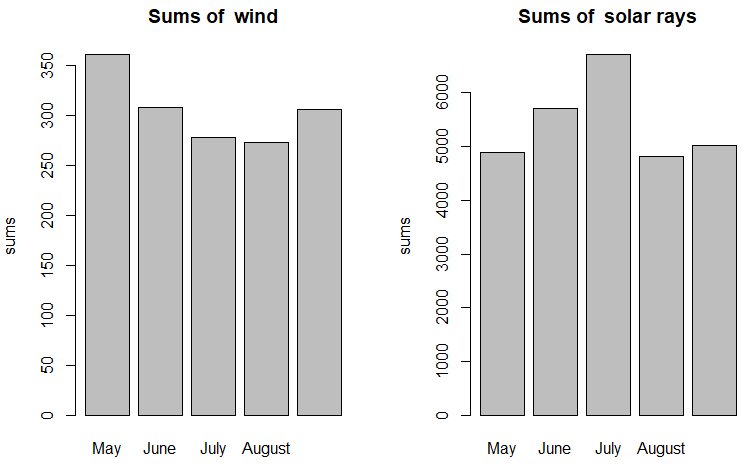

## SOLUTION

In [ ]:
factor_grapher <- function(data1,data2,factor_column)
{
    factor_column <- factor(factor_column)    
    condition<- readline("Do you want to plot sums or means? :")
    if(substr(condition,1,1)=="s")
    {    
        firstdata<-tapply(data1[complete.cases(data1)], factor_column[complete.cases(data1)], sum) 
        seconddata<- tapply(data2[complete.cases(data2)], factor_column[complete.cases(data2)], sum) 
        first_plot <- readline("What do you want to name your plot 1 : ")
        second_plot <- readline("What do you want to name your plot 2 : ")
        par(mfrow=c(1,2))
        barplot(firstdata, main = paste("Sums of ",first_plot),ylab="sums")
        barplot(seconddata,main = paste("Sums of ",second_plot),ylab="sums")
    }
    else if (substr(condition,1,1)=="m")
    {  
        firstdata<-tapply(data1[complete.cases(data1)], factor_column[complete.cases(data1)], mean)  
        seconddata<- tapply(data2[complete.cases(data2)], factor_column[complete.cases(data2)], mean) 
        first_plot <- readline("What do you want to name your plot 1 : ") 
        second_plot <- readline("What do you want to name your plot 2 : ") 
        par(mfrow=c(1,2))
        plot(firstdata,type = "b",xaxt = "n",col="blue",main = paste("Means of ",first_plot),ylab="means")
        axis(1 , at = 1:length(unique(factor_column)) , label = levels(factor_column) )
        plot(seconddata,type = "b",xaxt = "n",col="red",main = paste("Means of ",second_plot),ylab="means")
        axis(1 , at = 1:length(unique(factor_column)) , label = levels(factor_column) )
    }
}
factor_grapher(iris$Sepal.Length,iris$Sepal.Width,iris$Species)

# Since levels are not given in airquality data, we are adding mannualy (this is optional)
airq <- airquality
label_vek<-c("May", "June", "July", "August", "September")
airq$Month <- factor(airq$Month,labels = label_vek)
factor_grapher(airq$Wind,airq$Solar.R,airq$Month)

# PLOT MATRIX

##  QUESTION

Sometimes understanding how functions are related is crucial for data analysis, and the best way to do that is visualising those functions together. To achieve this, we want to create a function that shows the relationship between those functions in a matrix-like format, where every row and column represent a function.

Create a function named **plot_matrix** with 4 arguments:
  - **first_f, second_f, third_f**: functions that we want to visualize
  - **range**: range of values that the functions will take, with a default value of `seq(from = 0, to = 2*pi, length.out = 200)`
    
**plot_matrix** should be able to display 9 plots at the same time (with 3 rows and 3 columns). These plots should be over the **range** such that:

  - y-axis of every plot in the first row and x-axis of every plot in the first column is **first_f**
  - y-axis of every plot in the second row and x-axis of every plot in the second column is **second_f**
  - y-axis of every plot in the third row and x-axis of every plot in the third column is **third_f**
    
**Example:**
```r
> plot_matrix(sin, sqrt, cos)
```

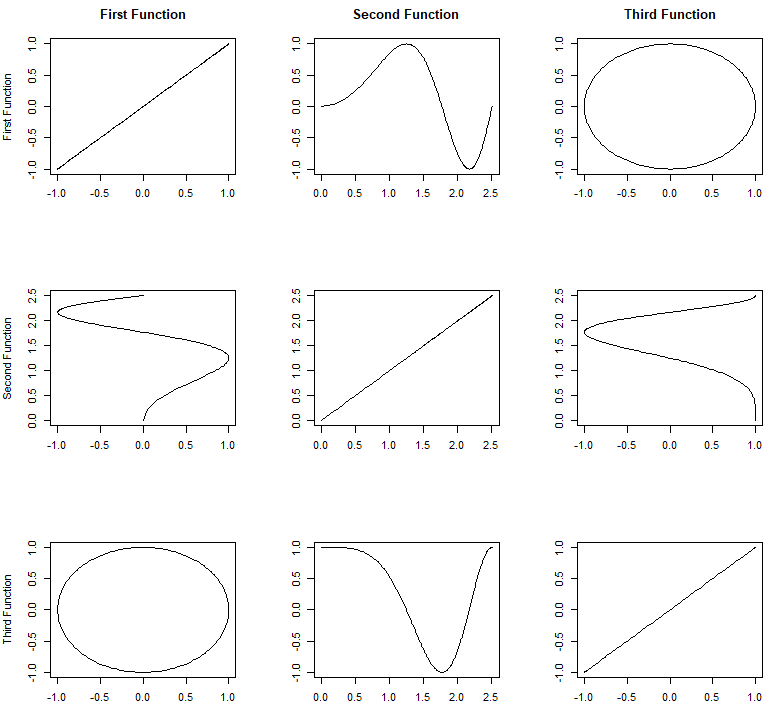

## SOLUTION

In [ ]:
#1
plot_matrix <- function(first_f, second_f, third_f, range = seq(from = 0, to = 2*pi, length.out = 200))
{
    par(mfcol = c(3,3))
    
    plot(first_f(range), first_f(range), type = "l", ylab = "First Function", xlab = " ", main = "First Function")
    plot(first_f(range), second_f(range), type = "l", ylab = "Second Function", xlab = " ")
    plot(first_f(range), third_f(range), type = "l", ylab = "Third Function", xlab = " ")
    
    plot(second_f(range), first_f(range), type = "l", ylab = "", xlab = " ", main = "Second Function")
    plot(second_f(range), second_f(range), type = "l", ylab = " ", xlab = " ")
    plot(second_f(range), third_f(range), type = "l", ylab = " ", xlab = " ")
    
    plot(third_f(range), first_f(range), type = "l", ylab = "", xlab = " ", main = "Third Function")
    plot(third_f(range), second_f(range), type = "l", ylab = " ", xlab = " ")
    plot(third_f(range), third_f(range), type = "l", ylab = " ", xlab = " ")   
}
plot_matrix(sin, sqrt, cos)

# PIA'S EXPERIMENT

##  QUESTION

Pia wants to do an experiment in the chemistry lab. There are 100 liquid chemicals in 100 different Erlenmeyer flasks. We do not know the names of the chemicals. They are labeled as "Chemical 1", "Chemical 2", etc.

Copy the lines below before solving the question:
```r
RNGversion("3.3.1")
set.seed(1)
```

1) In the first step of the experiment, Pia will measure the pH values of the chemicals and record them. The pH values are chosen from a uniformly distributed set between 0 and 14 (use 1 digit after the decimal point). Create a data frame named **chemicals** which holds the labels and the pH values of each chemical as such :

```r
> chemicals
              pHvalue
Chemical 1        3.7
Chemical 2        5.2
Chemical 3        8.0
Chemical 4       12.7
Chemical 5        2.8
.
.
.
Chemical 99      11.4
Chemical 100      8.5
```
2) In the second step of the experiment, Pia will decide whether the chemicals are acidic, basic, or neutral. If the pH value is lower than 7, it is asidic; if it is equal to 7, it is neutral and if it is higher than 7, it is basic. Create a function named **anb** with one argument **df** that takes **chemicals** as its default value and does the following :
   
   - It will create a factor object named **lbls** by using the given information. Its levels will be *Acid*, *Base* and *Neutral*. **lbls** should be created within the function but it should be defined globally.
  
   - It will modify **df** by adding **lbls** as a new column named **Acid_or_Base**.

 Try your function with **chemicals** and store the result in **final_df**:
 
 ```r
> final_df
                  pHvalue     Acid_or_Base
Chemical 1        3.7         Acid
Chemical 2        5.2         Acid
Chemical 3        8.0         Base
Chemical 4       12.7         Base
Chemical 5        2.8         Acid
.
.
.
Chemical 99      11.4         Base
Chemical 100      8.5         Base
```

*Hint: To define or modify a local variable in the global environment, use the operator ``<<-``.*
 
3) Plot the factor object **lbls** that you defined in the second question. Add a legend to your plot that shows the number of acidic, basic and neutral chemicals as such: 

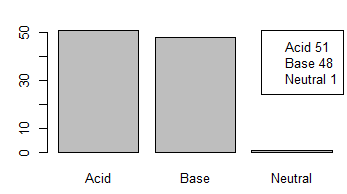

4) If an acid and a base react, this reaction is called neutralization. Create a function named **neutralization** with one argument **df** which has **final_df** as its default value. The function should do the following :
     
   - It will randomly select two chemicals and store their names(labels) in **chm**.
   - It will create a variable named **result**. When we mix up those two chemicals, if neutralization occurs (if one of the chemicals is acidic and the other one is basic or vice versa), **result** will be "*Neutralization*" otherwise it will be "*No Reaction*".
   - It will return a list which has **chm** and **result** as its components.
   
Here are some example outputs:
       
```r
> set.seed(1)
> neutralization(df = final_df)
$Chemicals
[1] "Chemical 27" "Chemical 37"

$Result
[1] "Neutralization"

```

```r

> set.seed(10)
> neutralization(df = final_df)
$Chemicals
[1] "Chemical 51" "Chemical 31"

$Result
[1] "No Reaction"
```

## SOLUTION

In [ ]:
RNGversion("3.3.1")
set.seed(1)

#1
names <- paste("Chemical", 1:100)
names
lqd <- round(runif(n = 100, max = 14, min = 0), digit = 1)
names(lqd) <- names
lqd
chemicals <- data.frame("pHvalue" = lqd)
chemicals

#2
anb <- function(df = chemicals)
{
    
    lbls <<- cut(df$pHvalue,breaks = c(0,7,14), right = F, include.lowest = T, labels = c("Acid","Base")) #Creating the factor object by using cut().lbls is globally defined when we use double arrows.
    levels(lbls) <<- c(levels(lbls),"Neutral")
    for(i in 1:length(df$pHvalue))
    {
        if(df[,1][i] == 7.0)
        { 
            lbls[i] <<- "Neutral"
        }
    }
    df <- data.frame(df,"Acid_or_Base" = lbls) #Creating the data frame.
    return(df)
}
final_df <- anb(df = chemicals)
final_df

#3
lvls <- levels(lbls)
lgnd <- c() #This for loop creates a vector with the numbers of acidic basic and neutral chemicals. lgnd will be used in legend of the plot.
for(i in 1: length(lvls))
{
    nmbr <- length(lbls[lbls == lvls[i]])
    lgnd <- c(lgnd,nmbr)
}
plot(lbls) 
legend("topright", legend = c(paste("Acid",lgnd[1]),paste("Base",lgnd[2]),paste("Neutral",lgnd[3]))) #Creating the legend.

#4
neutralization <- function(df)
{

    chm <- sample(rownames(final_df),2,replace = F) #choosing two chemicals randomly
    chm
    if(df[chm[1],][2] == "Acid" && df[chm[2],][2] == "Base" | df[chm[2],][2] == "Acid" && df[chm[1],][2] == "Base") result <- "Neutralization "
    else result <- "No Reaction" #If one of the chemicals is acidic and the other one is basic,neutralization occurs.Else, no reaction. 
    rslt <- list("Chemicals" = chm,"Result" = result) #Creating the resulting list.
    return(rslt)   
}

set.seed(1)
neutralization(final_df)
set.seed(10)
neutralization(final_df)